Importing modules.

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
import copy

Function to import an image.

In [3]:
def load_image(image_path:str):
    img = Image.open(image_path)
    img_arr = np.array(img)
    return img_arr

Testing the function.

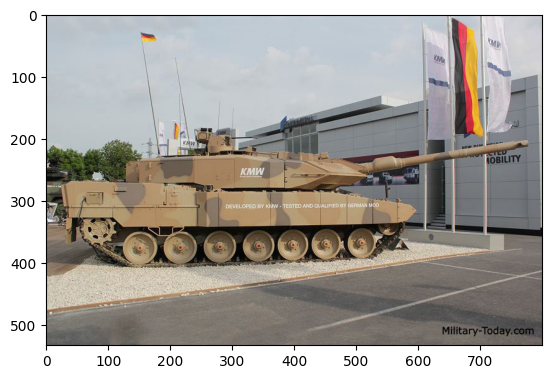

In [4]:
img_arr = load_image("images/training/tanks/leopard_2a7/leopard_2a7_l5.jpg")
plt.imshow(img_arr)

Function to lower resolution of the image. It is needed to make computations faster.

In [5]:
num_px = 64
def load_lower_resolution(img):
    new_img = np.array(Image.open(img).resize((num_px, num_px)))
    return new_img

Testing the function.

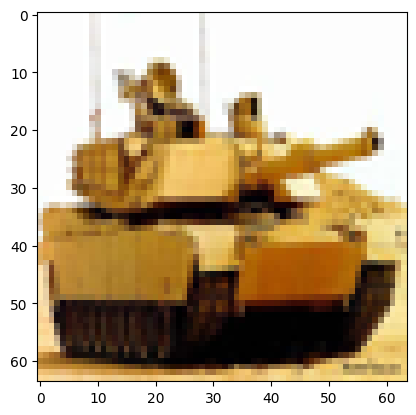

In [6]:
plt.imshow(load_lower_resolution("images/training/tanks/m1a2_abrams/m1a2_abrams_main.jpg"))

Function to load all images from given directory.

In [7]:
def load_images_from_directory(directory_path, lower_resolution=False):
    images = list()
    labels = list()

    for root, _, files in os.walk(directory_path):
        for filename in files:
            file_path = os.path.join(root, filename)

            # Determine the label based on the directory structure
            grandparent_folder = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            if grandparent_folder.lower() == 'tanks':
                label = 1
            else:
                label = 0
            
            # Load image with optional resizing
            if lower_resolution:
                images.append(load_lower_resolution(file_path))
            else:
                images.append(load_image(file_path))
            
            # Append label
            labels.append(label)
    
    return images, labels

Shuffle the images.

In [8]:
def shuffle_images_and_labels(images, labels):
    """Shuffle images and their corresponding labels.

    Args:
        images (list): List of images.
        labels (list): List of labels.

    Returns:
        tuple: A tuple (shuffled_images, shuffled_labels), where shuffled_images is a list of images and shuffled_labels is a list of labels.
    """
    # Combine images and labels into a list of tuples
    combined = list(zip(images, labels))
    
    # Shuffle the combined list
    random.shuffle(combined)
    
    # Unzip the combined list
    shuffled_images, shuffled_labels = zip(*combined)
    
    return list(shuffled_images), list(shuffled_labels)

Loading training data.

In [40]:
start_time = time.time()
train_set_x_orig_good_quality, train_set_y_good_quality = load_images_from_directory("images/training", False)
train_set_x_orig_good_quality, train_set_y_good_quality = shuffle_images_and_labels(train_set_x_orig_good_quality, train_set_y_good_quality)
train_set_x_orig, train_set_y = load_images_from_directory("images/training", True)
train_set_x_orig, train_set_y = shuffle_images_and_labels(train_set_x_orig, train_set_y)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to load data: {elapsed_time:.2f} seconds")

Time taken to load data: 13.76 seconds


Convert training arrays that will actually be used to train the model into numpy arrays.

In [10]:
train_set_x_orig = np.array(train_set_x_orig)
train_set_y = np.array(train_set_y)

Testing the functions. The index can be changed.

It's a tank


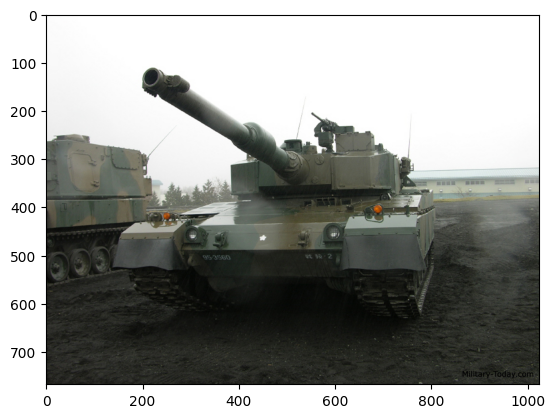

In [11]:
index = 227
plt.imshow(train_set_x_orig_good_quality[index])
print("It's a tank" if train_set_y_good_quality[index] == 1 else "Not a tank")

Testing the functions. All images must have the same dimensions. The index can be changed.

It's a tank


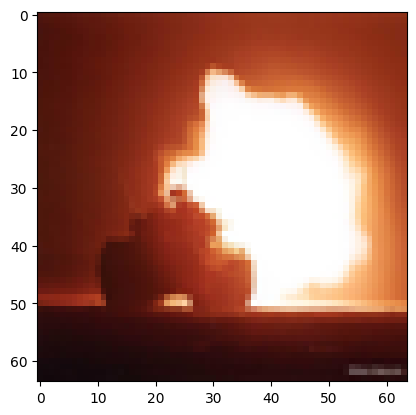

In [12]:
index = 142
plt.imshow(train_set_x_orig[index])
print("It's a tank" if train_set_y[index] == 1 else "Not a tank")

Loading test data.

In [41]:
start_time = time.time()
test_set_x_orig_good_quality, test_set_y_good_quality = load_images_from_directory("images/test", False)
test_set_x_orig_good_quality, test_set_y_good_quality = shuffle_images_and_labels(test_set_x_orig_good_quality, test_set_y_good_quality)
test_set_x_orig, test_set_y = load_images_from_directory("images/test", True)
test_set_x_orig, test_set_y = shuffle_images_and_labels(test_set_x_orig, test_set_y)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to load data: {elapsed_time:.2f} seconds")

Time taken to load data: 0.84 seconds


Convert test arrays that will actually be used to train the model into numpy arrays.

In [14]:
test_set_x_orig = np.array(test_set_x_orig)
test_set_y = np.array(test_set_y)

Testing the functions. The index can be changed.

It's a tank


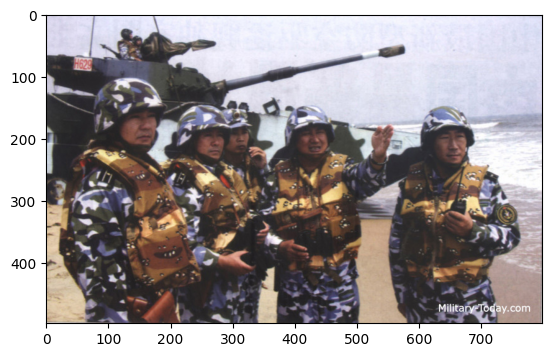

In [15]:
index = 18
plt.imshow(test_set_x_orig_good_quality[index])
print("It's a tank" if test_set_y_good_quality[index] == 1 else "Not a tank")

Testing the functions. All images must have the same dimensions. The index can be changed.

Not a tank


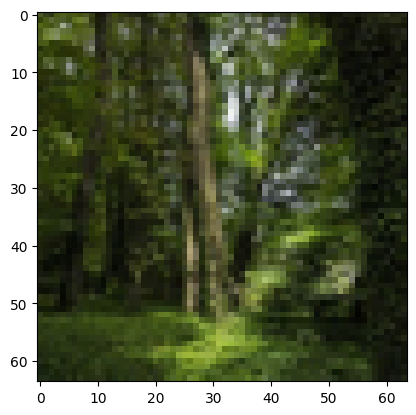

In [48]:
index = 34
plt.imshow(test_set_x_orig[index])
print("It's a tank" if test_set_y[index] == 1 else "Not a tank")

Check/get dimensions.

In [17]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]

print(f"There are {m_train} images in the train_set_x_orig")
print(f"There are {m_test} images in the test_set_x_orig")
assert m_train == train_set_y.size
assert m_test == test_set_y.size
print(f"Each image is {num_px}x{num_px}px")

There are 1987 images in the train_set_x_orig
There are 188 images in the test_set_x_orig
Each image is 64x64px


Reshaping the images arrays (needed for further calculations).

In [18]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1).T

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [19]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/explanation/Reg.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

There is a need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions.

In [20]:
def sigmoid(z: np.ndarray)->np.ndarray:
    return 1/(1+np.exp(-z))

w and b init.

In [21]:
def initialize_with_zeros(dim:int)->tuple:
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

There is a need to implement a function `propagate()` that computes the cost function and its gradient.

**Forward Propagation**:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas that will be used: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [22]:
def propogate(w,b,X,Y):
    m = X.shape[1]
    w = w.reshape(-1, 1)
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y)*np.log(1 - A))

    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)

    cost = np.squeeze(np.array(cost)) 
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [23]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = list()

    for i in range(num_iterations):
        grads, cost = propogate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))


    params = {"w" : w, "b" : b}
    grads = {"dw" : dw, "db" : db}

    return params, grads, costs 

The previous function will output the learned w and b. The variables w and b are used to predict the labels for a dataset X. Now it's time to implement the `predict()` function. The steps are:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.


In [32]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
    # A looks smth like [[0.70056714, 0.7195176, 0.73709128, 0.75340312]] so we have to access by typing A[0,index], since it's a list in list
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1.0
        elif A[0,i] <= 0.5:
            Y_prediction[0,i] = 0.0

    return Y_prediction 

It's time to see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

In [33]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w = np.zeros((X_train.shape[0],1))
    b = 0.0
    params, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)

    w = params["w"]
    b = params["b"]

    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Training the model.

In [34]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=3000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.477104
Cost after iteration 200: 0.408121
Cost after iteration 300: 0.385138
Cost after iteration 400: 0.370331
Cost after iteration 500: 0.359639
Cost after iteration 600: 0.352318
Cost after iteration 700: 0.347011
Cost after iteration 800: 0.342316
Cost after iteration 900: 0.337946
Cost after iteration 1000: 0.333841
Cost after iteration 1100: 0.329960
Cost after iteration 1200: 0.326272
Cost after iteration 1300: 0.322753
Cost after iteration 1400: 0.319384
Cost after iteration 1500: 0.316149
Cost after iteration 1600: 0.313035
Cost after iteration 1700: 0.310032
Cost after iteration 1800: 0.307131
Cost after iteration 1900: 0.304323
Cost after iteration 2000: 0.301602
Cost after iteration 2100: 0.298962
Cost after iteration 2200: 0.296398
Cost after iteration 2300: 0.293904
Cost after iteration 2400: 0.291477
Cost after iteration 2500: 0.289113
Cost after iteration 2600: 0.286809
Cost after iteration 2700: 0.284561
Cost

Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

Not a tank


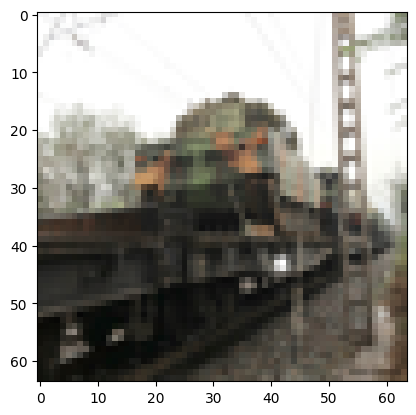

In [52]:
index = 18
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("It's a tank" if test_set_y[index] == 1 else "Not a tank")

Ploting the cost function and the gradients.

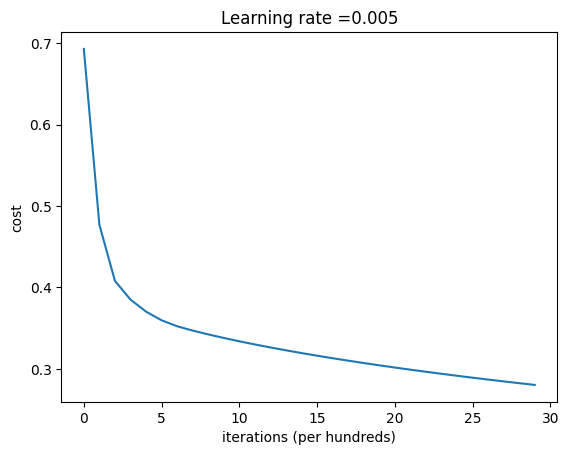

In [53]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

The comparison of the learning curve of our model with several choices of learning rates:

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



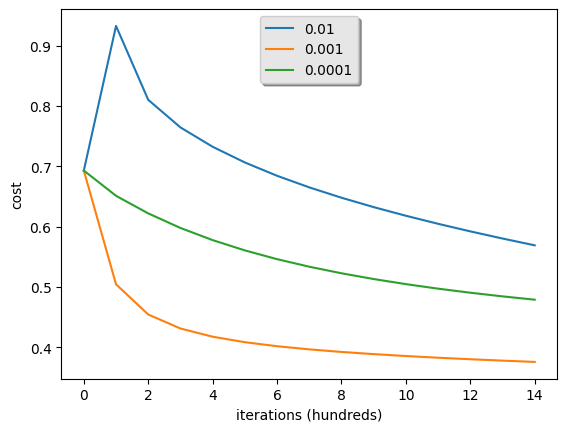

In [38]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

You can use your own image and see the output of your model. To do that:

    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = tank, 0 = non-tank)!

It's a tank


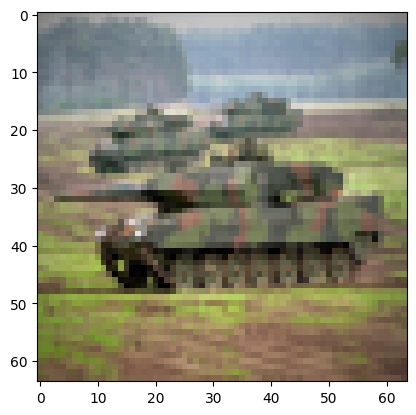

In [37]:
# change this to the name of your image file
my_image = "user_test/leopard_tank.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("It's a tank" if my_predicted_image == 1 else "Not a tank")